In [97]:
import pandas as pd
import matplotlib.pyplot as plt

AGE_DATA = "data/TS007-2021-3.csv"
age_data = pd.read_csv(AGE_DATA)

In [98]:
counts = age_data.groupby(by=["local_name"]).sum().drop(labels=["local_code", "age_code", "age_name"], axis='columns')
print(counts)

               count
local_name          
Adur           64547
Allerdale      96156
Amber Valley  126205
Arun          164896
Ashfield      126305
...              ...
Wrexham       135115
Wychavon      132495
Wyre          111949
Wyre Forest   101609
York          202821

[331 rows x 1 columns]


In [99]:

new_df = age_data[(age_data["age_code"] >= 24) & (age_data["age_code"] <= 32)].groupby(by=["local_name"]).sum()
print(new_df.sort_values(by=["count"], ascending=False))


                                                        local_code  age_code  \
local_name                                                                     
Birmingham       E08000025E08000025E08000025E08000025E08000025E...       252   
Leeds            E08000035E08000035E08000035E08000035E08000035E...       252   
Manchester       E08000003E08000003E08000003E08000003E08000003E...       252   
Wandsworth       E09000032E09000032E09000032E09000032E09000032E...       252   
Bristol          E06000023E06000023E06000023E06000023E06000023E...       252   
...                                                            ...       ...   
Ryedale          E07000167E07000167E07000167E07000167E07000167E...       252   
West Devon       E07000047E07000047E07000047E07000047E07000047E...       252   
Rutland          E06000017E06000017E06000017E06000017E06000017E...       252   
City of London   E09000001E09000001E09000001E09000001E09000001E...       252   
Isles of Scilly  E06000053E06000053E0600

In [100]:
new_df = new_df.merge(counts, left_on=["local_name"], right_on=["local_name"])
print(new_df)

                                                     local_code  age_code  \
local_name                                                                  
Adur          E07000223E07000223E07000223E07000223E07000223E...       252   
Allerdale     E07000026E07000026E07000026E07000026E07000026E...       252   
Amber Valley  E07000032E07000032E07000032E07000032E07000032E...       252   
Arun          E07000224E07000224E07000224E07000224E07000224E...       252   
Ashfield      E07000170E07000170E07000170E07000170E07000170E...       252   
...                                                         ...       ...   
Wrexham       W06000006W06000006W06000006W06000006W06000006W...       252   
Wychavon      E07000238E07000238E07000238E07000238E07000238E...       252   
Wyre          E07000128E07000128E07000128E07000128E07000128E...       252   
Wyre Forest   E07000239E07000239E07000239E07000239E07000239E...       252   
York          E06000014E06000014E06000014E06000014E06000014E...       252   

In [114]:
new_df["ratios"] = new_df[["count_x"]].div(new_df["count_y"].values, axis=0)
cleaned_data = new_df[["local_code", "ratios"]]

print(cleaned_data.sort_values(by=["ratios"], ascending=False)) # woooo success

                                                         local_code    ratios
local_name                                                                   
Tower Hamlets     E09000030E09000030E09000030E09000030E09000030E...  0.253449
Wandsworth        E09000032E09000032E09000032E09000032E09000032E...  0.244820
City of London    E09000001E09000001E09000001E09000001E09000001E...  0.243502
Lambeth           E09000022E09000022E09000022E09000022E09000022E...  0.243315
Islington         E09000019E09000019E09000019E09000019E09000019E...  0.233915
...                                                             ...       ...
West Devon        E07000047E07000047E07000047E07000047E07000047E...  0.078801
South Hams        E07000044E07000044E07000044E07000044E07000044E...  0.078700
Rother            E07000064E07000064E07000064E07000064E07000064E...  0.077628
North Norfolk     E07000147E07000147E07000147E07000147E07000147E...  0.077019
Derbyshire Dales  E07000035E07000035E07000035E07000035E07000035E

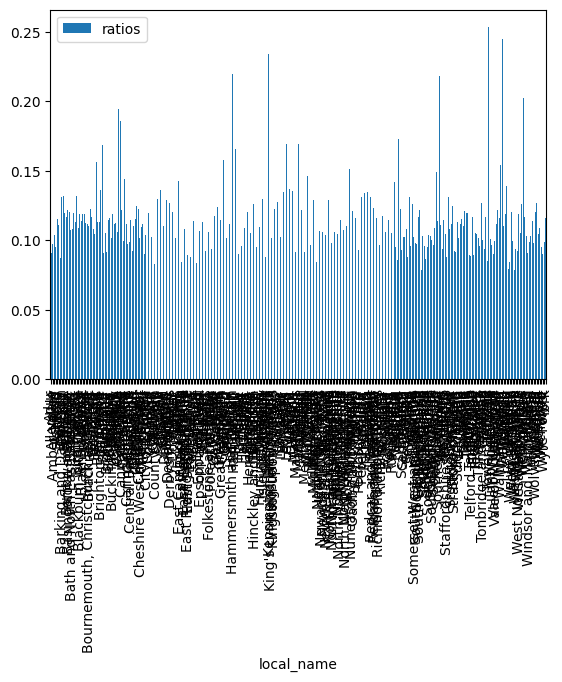

In [115]:
plot = cleaned_data.plot.bar()
